In [1]:
import pandas as pd
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv('After_text_analysis.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_name           3371 non-null   object 
 1   book_series         3371 non-null   object 
 2   book_series_number  3371 non-null   float64
 3   authorName          3371 non-null   object 
 4   description         3371 non-null   object 
 5   pages               3371 non-null   float64
 6   rating              3371 non-null   float64
 7   rating_Count        3371 non-null   float64
 8   reviews_Count       3371 non-null   float64
 9   ISBN13              3371 non-null   float64
 10  published_year      3371 non-null   float64
 11  published_month     3371 non-null   float64
 12  Rating5             3371 non-null   float64
 13  Rating4             3371 non-null   float64
 14  Rating3             3371 non-null   float64
 15  Rating2             3371 non-null   float64
 16  Rating

In [4]:
df00= df.drop(columns=['book_name', 'book_series',"authorName", 'description']).copy()
df00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_series_number  3371 non-null   float64
 1   pages               3371 non-null   float64
 2   rating              3371 non-null   float64
 3   rating_Count        3371 non-null   float64
 4   reviews_Count       3371 non-null   float64
 5   ISBN13              3371 non-null   float64
 6   published_year      3371 non-null   float64
 7   published_month     3371 non-null   float64
 8   Rating5             3371 non-null   float64
 9   Rating4             3371 non-null   float64
 10  Rating3             3371 non-null   float64
 11  Rating2             3371 non-null   float64
 12  Rating1             3371 non-null   float64
 13  Rating5_Percent     3371 non-null   float64
 14  Rating4_Percent     3371 non-null   float64
 15  Rating3_Percent     3371 non-null   float64
 16  Rating

In [5]:
df1=(df00-df00.mean())/df00.std()

In [6]:
# We want to predict the 'rating_Count' variable, so we split the dataset to X and y:


X1 = df1.drop('rating_Count',axis=1)
y1 = df1['rating_Count']

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X1, y1, test_size=0.2,random_state=0)

reg = LinearRegression()
reg.fit(xtrain1, ytrain1)
acc1 = reg.score(xtest1, ytest1)

print(acc1)

1.0


In [7]:
col2=['Rating5', 'Rating4','Rating3', 'Rating2', 'Rating1']

In [8]:
df2= df1.drop(columns=['Rating5', 'Rating4','Rating3', 'Rating2', 'Rating1']).copy()


## Rating5', 'Rating4','Rating3', 'Rating2', 'Rating1'  are in insync with rating_Count make it hard for the LinearRegression to work with them

## so I'm removing them
### and puting back one at the time


In [9]:

for col_with in col2:
    df2[col_with]=df1[col_with]

    X2 = df2.drop(['rating_Count'], axis=1)
    y2 = df2['rating_Count']

    xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X2, y2, random_state=0)

    reg = LinearRegression() 
    reg.fit(xtrain2, ytrain2)
    acc2 = reg.score(xtest2, ytest2)
    
    print("LinearRegression with column ",col_with," ",acc2)
    
    df2= df2.drop(columns=[col_with])

    

LinearRegression with column  Rating5   0.9578713507095706
LinearRegression with column  Rating4   0.9862868603532567
LinearRegression with column  Rating3   0.9256968739947381
LinearRegression with column  Rating2   0.8046080424149872
LinearRegression with column  Rating1   0.7440811922769541


## with out all of this columns=['Rating5', 'Rating4','Rating3', 'Rating2', 'Rating1']


In [10]:
X3 = df2.drop('rating_Count',axis=1)
y3 = df2['rating_Count']

xtrain3, xtest3, ytrain3, ytest3 = train_test_split(X3, y3, test_size=0.2,random_state=0)

reg = LinearRegression()
reg.fit(xtrain3, ytrain3)
acc3 = reg.score(xtest3, ytest3)

print(acc3)

0.5524810394295633


### let's drop  'reviews_Count' and see how the rest of Details work it out


In [11]:

df3= df2.drop(columns=['reviews_Count']).copy()

X4 = df3.drop('rating_Count',axis=1)
y4 = df3['rating_Count']

xtrain4, xtest4, ytrain4, ytest4 = train_test_split(X4, y4, test_size=0.2,random_state=0)

reg = LinearRegression()
reg.fit(xtrain4, ytrain4)
acc4 = reg.score(xtest4, ytest4)

print(acc4)


0.06069654278468173


### it is all seating on this 6 columns

and the rest of the data doesn't give much useful information

## but I'll keep 'reviews_Count' because it doesn't directly influencing 'rating_Count'

In [12]:
reg2= LinearRegression()
reg2.fit(xtrain3, ytrain3)

y_pred3 = reg2.predict(xtest3)

print('MSE:', metrics.mean_squared_error(ytest3, y_pred3))
print('R^2:', metrics.r2_score(ytest3, y_pred3))



MSE: 0.4738494074208035
R^2: 0.5524810394295633


## let's try puting them back all together 

In [13]:
reg1 = LinearRegression()
reg1.fit(xtrain1, ytrain1)

y_pred1 = reg1.predict(xtest1)

print('MSE:', metrics.mean_squared_error(ytest1, y_pred1))
print('R^2:', metrics.r2_score(ytest1, y_pred1))

# e-30

MSE: 1.151964133430775e-30
R^2: 1.0


# let's see how each variable affects our model

##  with out all of this columns=['Rating5', 'Rating4','Rating3', 'Rating2', 'Rating1']  


In [14]:
d = dict(zip(list(X2.columns), list(sorted(abs(reg2.coef_), reverse=True))))

for i in d:
    print(i, ':', d[i])

book_series_number : 0.8470059200363921
pages : 0.5405377325253498
rating : 0.41269708133657734
reviews_Count : 0.3850151099802399
ISBN13 : 0.3256240930204899
published_year : 0.30103817272837974
published_month : 0.20225808467017992
Rating5_Percent : 0.19963172463622988
Rating4_Percent : 0.10114831961819656
Rating3_Percent : 0.08382497552918051
Rating2_Percent : 0.03968149796058463
Rating1_Percent : 0.027557146242365504
people_liked : 0.022144491192560185
dark : 0.020709192410578097
even : 0.020318434936215116
ever : 0.019534661148144422
family : 0.019448589776703572
find : 0.019419788493733433
first : 0.018179333023229473
life : 0.01678042285820215
love : 0.015683430047178114
magic : 0.012167687844466828
man : 0.011961908946766676
must : 0.011816502674177016
never : 0.010188781959640491
new : 0.0063507110155788665
old : 0.006343911374711802
power : 0.0059923804270077844
time : 0.003582446617848536
war : 0.0034926681723232663
world : 0.0025940850757461484
years : 0.001247027022814455


## all together 

In [15]:
d = dict(zip(list(X1.columns), list(sorted(abs(reg1.coef_), reverse=True))))

for i in d:
    print(i, ':', d[i])

book_series_number : 0.442153530195218
pages : 0.35113757510260035
rating : 0.19160496900195698
reviews_Count : 0.0570859549049922
ISBN13 : 0.026523850740756978
published_year : 6.771852659612962e-16
published_month : 6.574318818494884e-16
Rating5 : 4.2749780529277256e-16
Rating4 : 3.507972956608826e-16
Rating3 : 2.990378703442947e-16
Rating2 : 2.274449249976675e-16
Rating1 : 1.543593167349371e-16
Rating5_Percent : 1.1104950242742107e-16
Rating4_Percent : 1.0794583278605071e-16
Rating3_Percent : 1.0118444575878267e-16
Rating2_Percent : 1.0100434387963994e-16
Rating1_Percent : 9.54391863021896e-17
people_liked : 8.167306152017806e-17
dark : 7.235018150338231e-17
even : 7.076143117232401e-17
ever : 7.037641494716859e-17
family : 6.334913447615559e-17
find : 6.285503988776025e-17
first : 6.054076213571042e-17
life : 5.802654532955118e-17
love : 5.375223062342385e-17
magic : 5.275870251518873e-17
man : 4.521564003684459e-17
must : 3.603765217763047e-17
never : 3.2796759130609865e-17
new : 

##  with out all of this columns=['Rating5', 'Rating4','Rating3', 'Rating2', 'Rating1']  

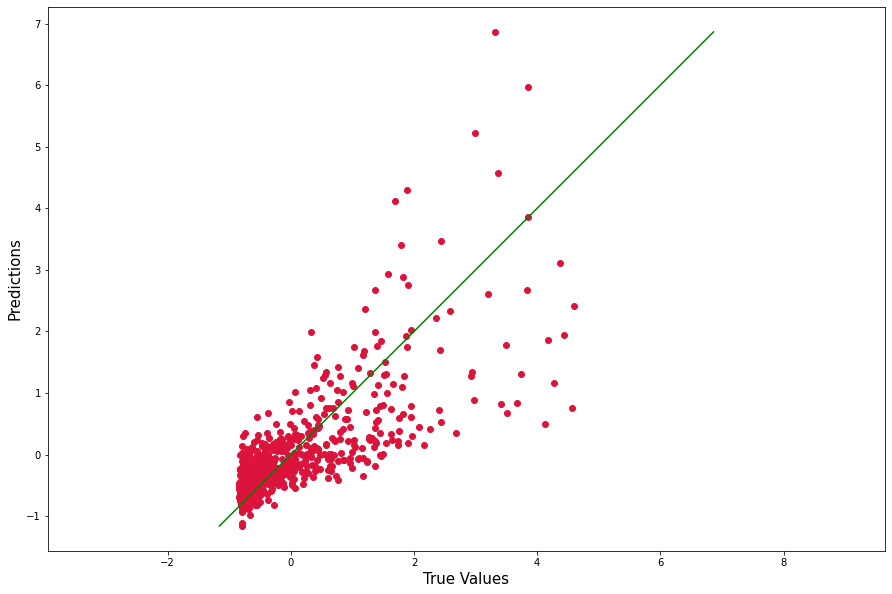

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(ytest3, y_pred3, c='crimson')
p1 = max(max(y_pred3), max(ytest3))
p2 = min(min(y_pred3), min(ytest3))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## all together 

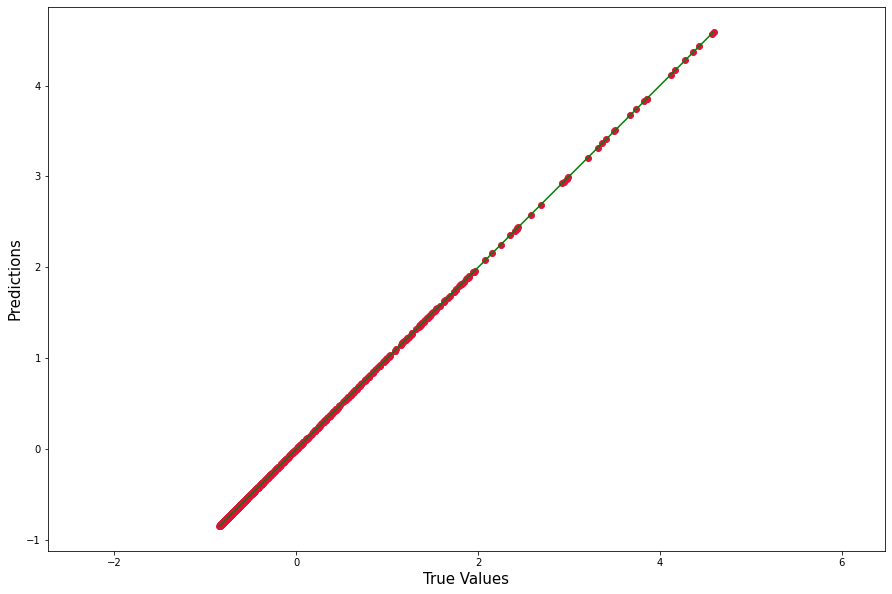

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(ytest1, y_pred1, c='crimson')
p1 = max(max(y_pred1), max(ytest1))
p2 = min(min(y_pred1), min(ytest1))
plt.plot([p1, p2], [p1, p2], 'g-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# we can see if we will put them all together the dots from a straight 